In [8]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("flights_state_fix.csv")

In [3]:
data.columns

Index(['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'TAILNUM', 'FLIGHTNUM',
       'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME', 'ORIGINSTATE',
       'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME', 'DESTCITYNAME',
       'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME', 'DEPDELAY',
       'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME', 'ARRTIME',
       'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY'],
      dtype='object')

In [53]:
# categorical data: 

cdata = data[['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'TAILNUM', 'FLIGHTNUM',
       'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME', 'ORIGINSTATE',
       'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME', 'DESTCITYNAME',
       'DESTSTATE', 'DESTSTATENAME', 'CANCELLED','DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY']]

In [65]:
cdata.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY
0,54548800,20020101,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,Dallas Love Field,Dallas,TX,Texas,F,False,580 miles,Southwest Airlines Co.,NaN
1,55872300,20020101,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,False,F,744 miles,Continental Air Lines Inc.,NaN
2,54388800,20020101,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas City International,Kansas City,MO,Missouri,F,False,718 miles,Southwest Airlines Co.,NaN
3,54486500,20020101,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,McCarran International,Las Vegas,NV,Nevada,0,0,487 miles,Southwest Airlines Co.,NaN
4,55878700,20020103,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,False,744 miles,Continental Air Lines Inc.,NaN


In [4]:
# Pull numeric data into new df

ndata = data[['CRSDEPTIME','DEPTIME','DEPDELAY','TAXIOUT','WHEELSOFF','WHEELSON','TAXIIN','CRSARRTIME','ARRTIME','ARRDELAY','CRSELAPSEDTIME','ACTUALELAPSEDTIME']]

In [15]:
ndata.shape

(1009293, 12)

In [13]:
ndata = ndata.dropna()

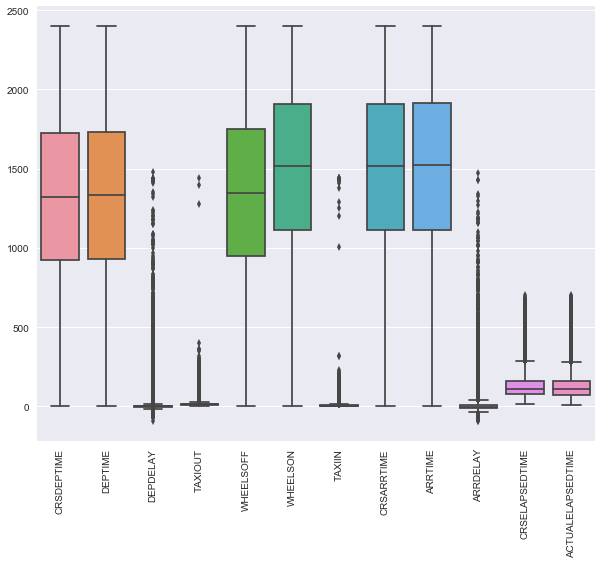

In [14]:
# quick view box plot:

fig, ax = plt.subplots(figsize = (10,8))
bp = sns.boxplot(data = ndata)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

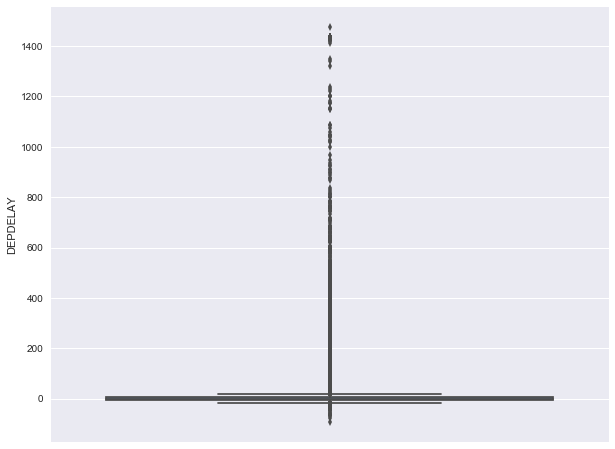

In [17]:
#ndata['DEPDELAY'].dropna()
fig, ax = plt.subplots(figsize = (10,8))
bp = sns.boxplot(ndata['DEPDELAY'], orient='v')

In [18]:
scaler = StandardScaler()

scaled_array = scaler.fit_transform(ndata)

scaled_data = pd.DataFrame(scaled_array, columns = ndata.columns)

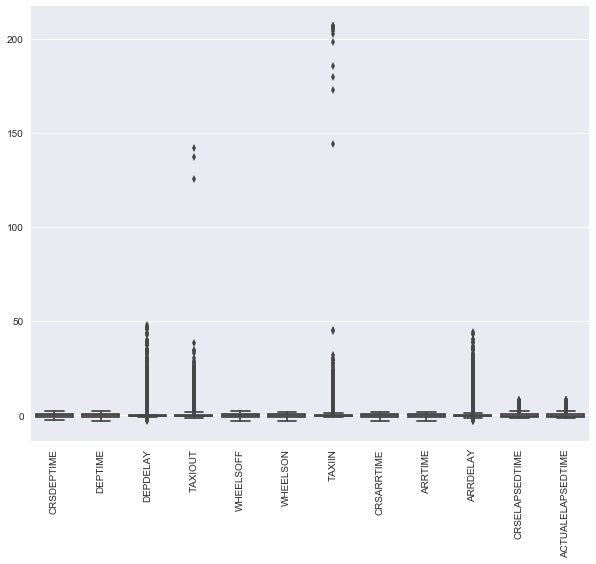

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
bp = sns.boxplot(data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

In [32]:
# remove outliers over all data 

q1 = ndata.quantile(0.25)
q3 = ndata.quantile(0.75)
iqr = q3 - q1
print(iqr)

CRSDEPTIME           799.0
DEPTIME              801.0
DEPDELAY               9.0
TAXIOUT                8.0
WHEELSOFF            801.0
WHEELSON             798.0
TAXIIN                 4.0
CRSARRTIME           796.0
ARRTIME              799.0
ARRDELAY              19.0
CRSELAPSEDTIME        84.0
ACTUALELAPSEDTIME     83.0
dtype: float64


In [79]:
z_rem = ndata[~((ndata < (q1 - 10 * iqr)) \
               | (ndata > (q3 + 10 * iqr))).any(axis=1)]

In [80]:
z_rem.shape

(985841, 12)

In [81]:
ndata.shape

(1009293, 12)

In [41]:
ndata.head()

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME
0,1425,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0
1,1130,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426,1435.0,9.0,116.0,119.0
2,1215,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500,1620.0,80.0,105.0,102.0
3,1925,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0
4,1455,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0


In [40]:
z_rem.head()

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME
0,1425,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0
1,1130,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426,1435.0,9.0,116.0,119.0
3,1925,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0
4,1455,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0
10,855,902.0,7.0,10.0,912.0,1008.0,2.0,1010,1010.0,0.0,75.0,68.0


In [82]:
scaled_array = scaler.fit_transform(z_rem)

scaled_data = pd.DataFrame(scaled_array, columns = z_rem.columns)

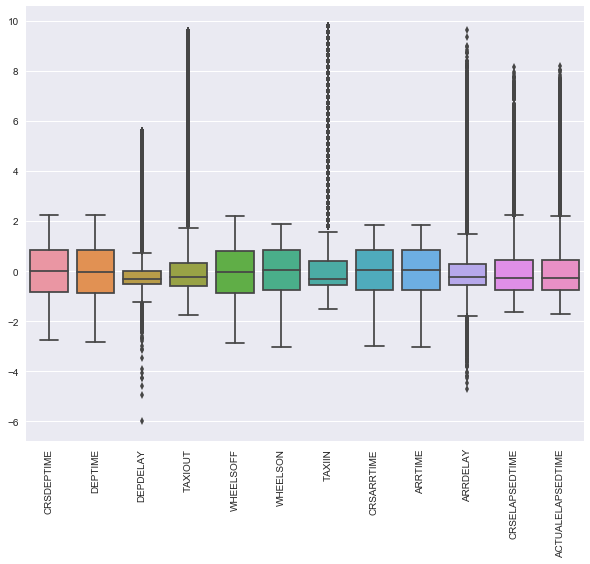

In [83]:
fig, ax = plt.subplots(figsize = (10,8))
bp = sns.boxplot(data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

In [84]:
data2 = data

In [85]:
dataF = pd.concat([z_rem, cdata], axis =1 )

In [70]:
pd.set_option('display.max_columns', None)

In [62]:
dataF.shape

(1191805, 32)

In [63]:
dataF.columns

Index(['CRSDEPTIME', 'DEPTIME', 'DEPDELAY', 'TAXIOUT', 'WHEELSOFF', 'WHEELSON',
       'TAXIIN', 'CRSARRTIME', 'ARRTIME', 'ARRDELAY', 'CRSELAPSEDTIME',
       'ACTUALELAPSEDTIME', 'TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE',
       'TAILNUM', 'FLIGHTNUM', 'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME',
       'ORIGINCITYNAME', 'ORIGINSTATE', 'ORIGINSTATENAME', 'DESTAIRPORTCODE',
       'DESTAIRPORTNAME', 'DESTCITYNAME', 'DESTSTATE', 'DESTSTATENAME',
       'CANCELLED', 'DIVERTED', 'DISTANCE', 'AIRLINENAME', 'AIRLINE_HISTORY'],
      dtype='object')

In [88]:
dataF.head(10)

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME,CANCELLED,DIVERTED,DISTANCE,AIRLINENAME,AIRLINE_HISTORY
0,1425.0,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655.0,1652.0,-3.0,90.0,87.0,54548800,20020101,WN,N103@@,1425,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,Dallas Love Field,Dallas,TX,Texas,F,False,580 miles,Southwest Airlines Co.,NaN
1,1130.0,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426.0,1435.0,9.0,116.0,119.0,55872300,20020101,CO,N83872,150,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,False,F,744 miles,Continental Air Lines Inc.,NaN
2,1215.0,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500.0,1620.0,80.0,105.0,102.0,54388800,20020101,WN,N334@@,249,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas City International,Kansas City,MO,Missouri,F,False,718 miles,Southwest Airlines Co.,NaN
3,1925.0,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950.0,1948.0,-2.0,85.0,83.0,54486500,20020101,WN,N699@@,902,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,McCarran International,Las Vegas,NV,Nevada,0,0,487 miles,Southwest Airlines Co.,NaN
4,1455.0,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750.0,1747.0,-3.0,115.0,114.0,55878700,20020103,CO,N58606,234,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,George Bush Intercontinental/Houston,Houston,TX,Texas,F,False,744 miles,Continental Air Lines Inc.,NaN
5,1610.0,1637.0,27.0,5.0,1642.0,1822.0,4.0,1805.0,1826.0,21.0,55.0,49.0,54380600,20020103,WN,N501@@,193,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LBB,Lubbock Preston Smith International,Lubbock,TX,Texas,False,F,289 miles,Southwest Airlines Co.,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55117600,20020104,DL,N37574,262,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,DFW,Dallas/Fort Worth International,Dallas/Fort Worth,TX,Texas,False,False,569 miles,Delta Air Lines Inc.,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55232700,20020105,DL,N517D1,1214,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,CVG,Cincinnati/Northern Kentucky International,Cincinnati,KY,Kentucky,F,False,1240 miles,Delta Air Lines Inc.,NaN
8,1750.0,1850.0,60.0,5.0,1855.0,1925.0,5.0,1840.0,1930.0,50.0,50.0,40.0,54624700,20020105,WN,N679@@,2122,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,ELP,El Paso International,El Paso,TX,Texas,False,F,223 miles,Southwest Airlines Co.,NaN
9,945.0,1020.0,35.0,8.0,1028.0,1108.0,7.0,1050.0,1115.0,25.0,125.0,115.0,54613800,20020105,WN,N791@@,2038,ABQ,Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAX,Los Angeles International,Los Angeles,CA,California,F,False,677 miles,Southwest Airlines Co.,NaN


In [89]:
dataF.to_csv("flights_z.csv", index=False)